# Boyle's law 

<span style="font-size: 25px; color: gray;">How do you verify a physical law?</span>

<table style="width: 100%; border-collapse: collapse; border: none;">
    <tr style="background-color: var(--background-color);">  
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Author:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Norbert van Veen and Ed van den Berg</td>
    </tr>
    <tr style="background-color: var(--background-color);"> 
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Time:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">10-20 minutes</td>
    </tr>
    <tr style="background-color: var(--background-color);"> 
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Age group:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">14+</td>
    </tr>
    <tr style="background-color: var(--background-color);"> 
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Concepts:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Boyle's Law, volume, pressure</td>
    </tr>
    <tr style="background-color: var(--background-color);"> 
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Skills:</td>
        <td style="text-align: left; padding: 3px; border: none; color: var(--text-color)">Designing experiment setup, identifying deviations, adjusting model</td>
    </tr>
</table>

## Introduction
Experimentally verifying a formula might seem trivial, but when you ask students in a concrete case - such as Boyle's Law - how to do it, problems arise. What do you want to measure? How do you measure it? When do you consider results to sufficiently match theory? With Boyle's law, results often don't align. Where does it go wrong? This demonstration lets students consider what goes wrong and how to adapt the model to compensate for incorrect assumptions.

```{figure} demo37_figure1.jpg
---
width: 70%
align: center
name: demo37_fig1
---
The experimental setup, with a syringe and a pressure sensor.
```

## Equipment
* Setup with a syringe
* A pressure sensor
* Measurement software (here we use Coach7)

## Preparation
Set up the apparatus as shown in {numref}`Figure {number} <demo37_fig1>`. Connect the pressure sensor to an interface and start the measurement program. Record both volume and pressure (at least eight different readings). 


```{tip}
Below we have our measurements, you can run the code cell (and insert your measurements) by clicking above on the {fa}`rocket`.
```

Especially take measurements at smaller volumes (higher pressures) since this is where issues with residual volume manifest. 

## Procedure
1.	Draw a closed volume of gas on the board (circle or square). *What happens to the pressure if we decrease the volume?* Students will likely have little trouble with this question.
2.	*But how exactly does it work? Can we encapsulate it in a formula? Boyle posited* $p \cdot V = \text{constant}$, *or for two situations:* $p_1 \cdot V_1 = p_2 \cdot V_2$. *What do you need to do to see if such a theoretical formula aligns with reality? How could you do that?* (very brief student discussion in pairs).
3.	Now the teacher shows the setup with a syringe with volume indication and a pressure sensor. *What should I do now to verify Boyle's Law?* Let the students think for a moment.
4.	Short discussion... Outcome: set different volumes and measure the pressure to see if it matches the formula.
5.	Then measure. Compare measured results with theoretical results.

```{figure} demo37_figure2.jpg
---
width: 100%
align: center
name: demo37_fig2
---
Measurements of gas pressure against volume.
```

6.	*The measured result don't match, what could be the reason?* (brief student discussion in pairs).
7.	*How can we adjust our model* $p \cdot V = \text{constant}$? (add constant term to $V$, the residual volume).
8.	*How can we determine its size? Is there a clever way to transform our graph and extract it from there?* (from the deviation of the graph).
Plot the graph of $\frac{1}{p}$ against $V$ by creating a variable $\frac{1}{p}$ in the Data Table. Show the graph of $\frac{1}{p}$ against $V$ to the students. Ask the students why it doesn't go through the origin. Have them read the residual volume from the graph.
9.	Save the measurements as a result file. Open and execute the corresponding graphical model and examine the result.
10.	Import the graph of the measurements as a background graph. Have students indicate where the differences are and try to get explanations from them.

```{figure} demo37_figure3.jpg
---
width: 100%
align: center
name: demo37_fig4
---
Model comparison Boyle (orange) versus Van der Waals (green).
```

```{tip}
* Clearly show the value of the pressure sensor on the digital board. 
* Show the students that the syringe is being depressed and explicitly mention the volume of the syringe.
```


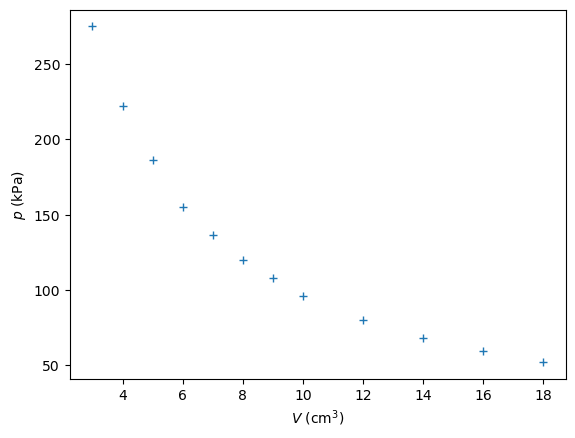

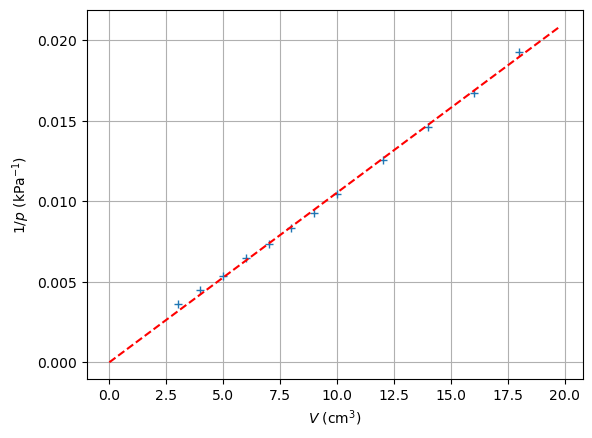

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

V = np.array([18.0, 16.0, 14.0, 12.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0])
p = np.array([51.9, 59.7, 68.3, 79.7, 95.9, 108.1, 119.8, 136.2, 154.9, 186.5, 222.4, 275.1])

plt.figure()
plt.plot(V, p, '+')
plt.xlabel('$V$ (cm$^3$)')
plt.ylabel('$p$ (kPa)')
plt.show()

# Fit a linear function to the data
def fitfunction(x,a):
    return a*x

val, cov = curve_fit(fitfunction, V, 1/p)

x_test = np.linspace(0, 1.1*max(V),1000)
y_test = fitfunction(x_test, val)

# Plot the data and the fit
plt.figure()
plt.plot(V, 1/p, '+',label='measurements')
plt.plot(x_test, y_test,'r--',label='fit')

plt.xlabel('$V$ (cm$^3$)')
plt.ylabel('$1/p$ (kPa$^{-1}$)')
plt.legend
plt.grid()
plt.show()


## Physics background
The pressure and volume of a closed quantity of ideal gas behave according to Boyle's Law. Due to the residual volume of the hose and the pressure sensor, the hyperbola of the measurements will deviate slightly from the volume that is read from the syringe. If we call the residual volume $\Delta V$, then Boyle's Law can be written as:

$$ P \cdot (V + \Delta V) = \text{constant} ( = n \cdot R \cdot T)$$

The ideal gas law assumes that the attraction between molecules is zero and that the molecules themselves are point particles that occupy no volume. Van der Waals took into account the attraction and volume of molecules:

$$ (p + \frac{n^2a}{V^2})(V-n \cdot b) = n \cdot R \cdot T $$

The pressure is corrected for attraction between molecules and also the volume of molecules is taken into account. These corrections become important at a higher density. The constant b is then roughly the volume of 1 mole, and the constant a depends on the attraction between molecules. These constants are determined empirically. For details, we refer to well-known textbooks such as {cite}`young2014`, chapter 17. Coach models for Boyle's Law and for the Van der Waals version are available on the site [**include link to the coach files**].

```{figure} demo37_figure4.jpg
---
width: 50%
align: center
name: demo37_fig3
---
Graphical model of Van der Waals gas law. 
```

## Follow-up
What influence does a lower or higher temperature have on gas pressure measurements?

The graphical model also shows the Van der Waals gas model. Plot this graph alongside Boyle's law and ask students to explain how the differences arise. At what pressures does Boyle's law deviate from Van der Waals' gas law?


## References
```{bibliography}
:filter: docname in docnames
```
